## NAC 1 - 4SIS

Anna Giulia Balbino Gatti Baani
Thais Aronica Rosa 


### **R1**

Use a imagem circulo.png para implementar um código que:
Segmenta apenas os círculos maiores da imagem, use a técnica que achar melhor. E exibe o resultado. (máx 3 pontos) 
Exibe na imagem a área e o centro de massa dos dois círculos segmentados da imagem. O resultado esperado e uma imagem com um marcação no centro indicando o CM e o valor da área; (máx 3 pontos) 
Essa rubrica pode ser feita no jupyter notebook ou google Colab.


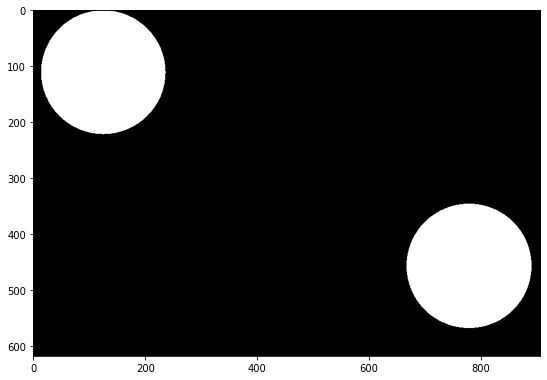

In [61]:
  
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png') 

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


image_lower_hsv0 = np.array([85, 160, 210])  
image_upper_hsv0 = np.array([95, 185, 230])

mask_hsv0 = cv2.inRange(img_hsv, image_lower_hsv0, image_upper_hsv0)


image_lower_hsv1 = np.array([0, 100, 100])  
image_upper_hsv1 = np.array([10, 255, 255])

mask_hsv1 = cv2.inRange(img_hsv, image_lower_hsv1, image_upper_hsv1)

image_lower_hsv2 = np.array([170, 100, 100])  
image_upper_hsv2 = np.array([180, 255, 255])

mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

mask_hsv = cv2.bitwise_or(mask_hsv1, mask_hsv2)


mask_hsv1 = cv2.bitwise_or(mask_hsv, mask_hsv0)


fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv1, cmap="Greys_r", vmin=0, vmax=255)
plt.show()   

Quantidade de contornos encontrado:  2
{'m00': 38526.0, 'm10': 29973486.5, 'm01': 17587465.5, 'm20': 23438224162.833332, 'm11': 13683155448.166666, 'm02': 8146417535.166666, 'm30': 18419716462558.25, 'm21': 10699743779666.334, 'm12': 6337958757540.167, 'm03': 3826266440864.75, 'mu20': 118650551.0988617, 'mu11': -10718.408264160156, 'mu02': 117581354.05027008, 'mu30': -1050596.94921875, 'mu21': 325662.1070251465, 'mu12': 1040818.7266998291, 'mu03': -323500.70703125, 'nu20': 0.07993959048712654, 'nu11': -7.221417510289304e-06, 'nu02': 0.07921922995426021, 'nu30': -3.6062126675211885e-06, 'nu21': 1.1178471597114787e-06, 'nu12': 3.57264855909712e-06, 'nu03': -1.1104280747394864e-06}
{'m00': 38526.0, 'm10': 29973486.5, 'm01': 17587465.5, 'm20': 23438224162.833332, 'm11': 13683155448.166666, 'm02': 8146417535.166666, 'm30': 18419716462558.25, 'm21': 10699743779666.334, 'm12': 6337958757540.167, 'm03': 3826266440864.75, 'mu20': 118650551.0988617, 'mu11': -10718.408264160156, 'mu02': 117581354

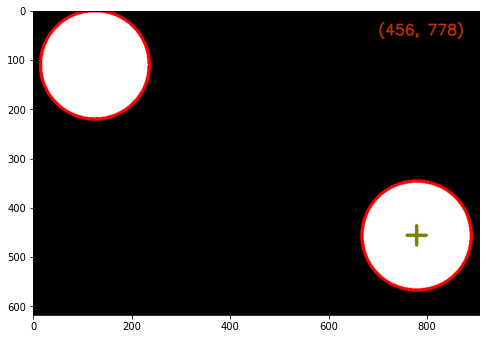

In [69]:
# Calculo das coordenadas do centro de massa

#recarregando o nosso exemplo...

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



image_lower_hsv0 = np.array([85, 160, 210])  
image_upper_hsv0 = np.array([95, 185, 230])

mask_hsv0 = cv2.inRange(img_hsv, image_lower_hsv0, image_upper_hsv0)

image_lower_hsv1 = np.array([0, 100, 100])  
image_upper_hsv1 = np.array([10, 255, 255])

mask_hsv1 = cv2.inRange(img_hsv, image_lower_hsv1, image_upper_hsv1)

image_lower_hsv2 = np.array([170, 100, 100])  
image_upper_hsv2 = np.array([180, 255, 255])

mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

mask_hsv = cv2.bitwise_or(mask_hsv1, mask_hsv2)


mask_hsvf = cv2.bitwise_or(mask_hsv, mask_hsv0)


# para quem tem opencv rev 3.x
#_,contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
#para quem tem opencv >rev4.x
contornos, _ = cv2.findContours(mask_hsvf, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
print("Quantidade de contornos encontrado: ", len(contornos))

mask_rgb = cv2.cvtColor(mask_hsvf, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);


plt.figure(figsize=(8,6))
plt.imshow(contornos_img);


print( M )

cnt = contornos[0]

M = cv2.moments(cnt)
print( M )


M2 = cv2.moments(cnt)


cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])


print("centro de massa na posição: ",cx, cy)



## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (700,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img);

In [14]:
#Implemente seu código





In [15]:
## Implemente seu código





In [17]:
# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario. 

cnt = contornos[0]

M = cv2.moments(cnt)
print( M )

{'m00': 20954.5, 'm10': 8414785.5, 'm01': 4813317.5, 'm20': 3414210172.083333, 'm11': 1932427931.625, 'm02': 1140509199.0833333, 'm30': 1399201096317.6501, 'm21': 783868070420.7833, 'm12': 457787216119.7167, 'm03': 278003040454.85004, 'mu20': 35049847.99971104, 'mu11': -475946.1051416397, 'mu02': 34874354.26211333, 'mu30': -7672941.9208984375, 'mu21': -4968840.380795479, 'mu12': 6858123.621509552, 'mu03': 2822544.575317383, 'nu20': 0.07982364109512664, 'nu11': -0.0010839348312655414, 'nu02': 0.07942396606302501, 'nu30': -0.00012071706132489804, 'nu21': -7.817390189392743e-05, 'nu12': 0.00010789766667418762, 'nu03': 4.4406603113053444e-05}


In [18]:
# Calculo das coordenadas do centro de massa

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)

centro de massa na possição:  401 229


 Vamos plotar isso na imagem para saber se esta correto. A função "cv2.line" vai nos ajudar a desenhar uma cruz. e função "cv2.putText" a escrever na imagem as coordenadas.

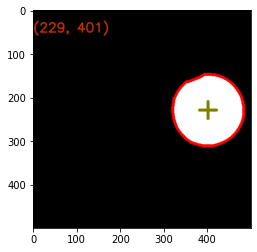

In [19]:
## para desenhar a cruz vamos passar a cor e o tamanho em pixel


size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (0,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img);

### DESAFIO 5

O desafio é juntar o que aprendemos em um video, use como base "webcam.py". Você deve seguimentar a cor de um objeto, encontrar seu contorno e montar a imagem segmentada com o centro de massa e suas coordenadas. Video de referência "segmenta_melancia.mp4"